In [1]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.losses import MeanSquaredError
from tensorflow.python.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_absolute_error 
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras_tuner import RandomSearch
from math import sqrt
from sklearn.metrics import mean_squared_error
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
inf_data1 = pd.read_csv(r"C:\Users\meena\OneDrive\Desktop\Documents\Mini_Project_2\Mini_Project2_Data.csv")
inf_data1.head()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,200940,10-10-2009,Bay Area,Influenza_A,36,220,16.36
1,2009-2010,200940,10-10-2009,Bay Area,Influenza_B,0,220,0.00
2,2009-2010,200940,10-10-2009,Bay Area,Total_Influenza,36,220,16.36
3,2009-2010,200940,10-10-2009,Bay Area,RSV,0,190,0.00
4,2009-2010,200940,10-10-2009,California,Influenza_A,1077,3324,32.40


In [4]:
inf_data1.isnull().sum()

season                  0
date_code               0
weekending              0
region                  0
respiratory_virus       0
number_positive         0
specimens_tested        0
percent_positive     7597
dtype: int64

In [5]:
inf_data1 = inf_data1.dropna()
inf_data1.isnull().sum()

season               0
date_code            0
weekending           0
region               0
respiratory_virus    0
number_positive      0
specimens_tested     0
percent_positive     0
dtype: int64

In [6]:
inf_data1['region'].value_counts()

California              7137
Central                 7121
Upper Southern          6999
Bay Area                5817
Lower Southern          5744
Northern                5140
Upper/Lower Southern    4404
Northern/Bay Area         52
Name: region, dtype: int64

In [7]:
inf_data1['season'].value_counts()

2018-2019    6045
2019-2020    6024
2017-2018    5931
2016-2017    5754
2015-2016    5608
2014-2015    4551
2013-2014    3460
2010-2011    1339
2011-2012    1261
2009-2010    1224
2012-2013    1217
Name: season, dtype: int64

In [8]:
inf_data1['respiratory_virus'].value_counts()

Influenza_A                  3668
Influenza_B                  3668
Total_Influenza              3668
RSV                          3641
Enterovirus_Rhinovirus       2322
Total_Parainfluenza          2321
Parainfluenza_UnknownType    2321
Parainfluenza_4              2321
Parainfluenza_3              2321
Parainfluenza_2              2321
Parainfluenza_1              2321
Adenovirus                   2320
HMPV                         2313
Coronavirus_HKU1             1148
Coronavirus_NL63             1148
Coronavirus_OC43             1148
Coronavirus_229E             1148
Coronavirus_UnknownType      1148
Total_Coronavirus            1148
Name: respiratory_virus, dtype: int64

In [9]:
inf_data1 = inf_data1.drop(['date_code'], axis = 1)

In [10]:
pd.set_option('mode.chained_assignment', None)

In [11]:
df1 = inf_data1.loc[inf_data1['respiratory_virus'] == 'Influenza_A'].copy()
df2 = inf_data1.loc[inf_data1["respiratory_virus"] == "RSV"].copy()
df3 = inf_data1.loc[inf_data1["respiratory_virus"] == "Adenovirus"].copy()
df4 = inf_data1.loc[inf_data1["respiratory_virus"] == "HMPV"].copy()

In [12]:
inf_df1 = pd.concat([df2, df1], ignore_index = True, axis = 0)
inf_df2 = pd.concat([inf_df1, df3], ignore_index = True, axis = 0)
inf_df3 = pd.concat([inf_df2, df4], ignore_index = True, axis = 0)
inf_df3.head()

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,10-10-2009,Bay Area,RSV,0,190,0.00
1,2009-2010,10-10-2009,California,RSV,2,2218,0.09
2,2009-2010,10-10-2009,Central,RSV,0,329,0.00
3,2009-2010,10-10-2009,Lower Southern,RSV,0,35,0.00
4,2009-2010,10-10-2009,Northern/Bay Area,RSV,2,1510,0.13


In [13]:
inf_df3['respiratory_virus'].value_counts()

Influenza_A    3668
RSV            3641
Adenovirus     2320
HMPV           2313
Name: respiratory_virus, dtype: int64

## ***CALIFORNIA***

In [14]:
df_reg1 = inf_df3.loc[inf_df3['region'] == 'Central'].copy()
df_reg1.head()

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
2,2009-2010,10-10-2009,Central,RSV,0,329,0.0
9,2009-2010,17-10-2009,Central,RSV,0,380,0.0
15,2009-2010,24-10-2009,Central,RSV,0,278,0.0
21,2009-2010,31-10-2009,Central,RSV,2,201,1.0
27,2009-2010,07-11-2009,Central,RSV,0,176,0.0


In [15]:
df_reg1_rv1 = df_reg1.loc[df_reg1['respiratory_virus'] == 'Influenza_A']
df_reg1_rv1

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
3643,2009-2010,10-10-2009,Central,Influenza_A,202,787,25.67
3650,2009-2010,17-10-2009,Central,Influenza_A,195,585,33.33
3656,2009-2010,24-10-2009,Central,Influenza_A,162,498,32.53
3662,2009-2010,31-10-2009,Central,Influenza_A,101,366,27.60
3668,2009-2010,07-11-2009,Central,Influenza_A,96,421,22.80
...,...,...,...,...,...,...,...
7281,2019-2020,29-08-2020,Central,Influenza_A,0,38,0.00
7287,2019-2020,05-09-2020,Central,Influenza_A,0,34,0.00
7293,2019-2020,12-09-2020,Central,Influenza_A,0,32,0.00
7299,2019-2020,19-09-2020,Central,Influenza_A,0,29,0.00


### **Influenza A**

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
df_r11 = df_reg1_rv1[['weekending', 'percent_positive']]
df_r11['InfA_PP'] = df_r11['percent_positive']
df_r11 = df_r11.drop(['percent_positive'], axis = 1)
df_r11['Year'] = pd.DatetimeIndex(df_r11['weekending']).year
df_r11.head()

,weekending,InfA_PP,Year
3643,10-10-2009,25.67,2009
3650,17-10-2009,33.33,2009
3656,24-10-2009,32.53,2009
3662,31-10-2009,27.60,2009
3668,07-11-2009,22.80,2009


In [18]:
df_r11['InfA_PP'].describe()

count    572.000000
mean       5.205420
std        8.757989
min        0.000000
25%        0.000000
50%        0.745000
75%        6.350000
max       49.040000
Name: InfA_PP, dtype: float64

In [19]:

df_r11.head()

,weekending,InfA_PP,Year
3643,10-10-2009,25.67,2009
3650,17-10-2009,33.33,2009
3656,24-10-2009,32.53,2009
3662,31-10-2009,27.60,2009
3668,07-11-2009,22.80,2009


In [20]:
df_r11.set_index('Year', drop = True, inplace = True)
df_r11.head()

,weekending,InfA_PP
Year,,
2009,10-10-2009,25.67
2009,17-10-2009,33.33
2009,24-10-2009,32.53
2009,31-10-2009,27.60
2009,07-11-2009,22.80


In [21]:
df_r11 = df_r11.drop(['weekending'], axis = 1)

## **LSTM MODEL**

In [22]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [23]:
window_size = 5
X_r11, y_r11 = df_to_X_y(df_r11, window_size)
X_r11.shape, y_r11.shape

((567, 5, 1, 1), (567, 1))

In [24]:
X_train_r11, y_train_r11 = X_r11[:250], y_r11[:250]
X_val_r11, y_val_r11 = X_r11[250:400], y_r11[250:400]
X_test_r11, y_test_r11 = X_r11[400:], y_r11[400:]

X_train_r11.shape, y_train_r11.shape, X_test_r11.shape, y_test_r11.shape, X_val_r11.shape, y_val_r11.shape 

((250, 5, 1, 1), (250, 1), (167, 5, 1, 1), (167, 1), (150, 5, 1, 1), (150, 1))

In [25]:

def build_model(hp):                 #hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape=(5, 1)))
    #providing the range for hidden layers  
    for i in range(hp.Int('num_of_layers',2,20)):         
        #providing range for number of neurons in hidden layers
        model.add(Dense(units=hp.Int('num_of_neurons'+ str(i),min_value=32,max_value=512,step=32),
                                    activation='relu'))
    model.add(Dense(1,activation='relu'))    #output layer
    #compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[0.1, 0.01, 0.001, 0.0001])),   #tuning learning rate
                  loss='mae',metrics=[RootMeanSquaredError()])
    return model
    

In [26]:
import keras_tuner as kt
import tensorflow as tf
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective="val_loss",
                     max_epochs=20,
                     directory="kt_dir",
                     project_name="kt_hyperband",)


INFO:tensorflow:Reloading Tuner from kt_dir\kt_hyperband\tuner0.json


In [27]:
# summary of tuner
tuner.search_space_summary()

Search space summary
Default search space size: 20
num_of_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
num_of_neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
num_of_neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max

In [28]:
# Tunner search
tuner.search(X_train_r11, y_train_r11, epochs = 10, validation_data = (X_val_r11, y_val_r11))
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r11 = optimum_model.fit(X_train_r11, y_train_r11, epochs = nb_epochs,validation_data = (X_val_r11, y_val_r11) ).history



INFO:tensorflow:Oracle triggered exit
Epoch 1/25
8/8 [==============================] - 1s 49ms/step - loss: 1.9891 - root_mean_squared_error: 4.4174 - val_loss: 1.2765 - val_root_mean_squared_error: 3.5171
Epoch 2/25
8/8 [==============================] - 0s 8ms/step - loss: 1.3673 - root_mean_squared_error: 3.2025 - val_loss: 1.4123 - val_root_mean_squared_error: 3.0062
Epoch 3/25
8/8 [==============================] - 0s 8ms/step - loss: 1.2806 - root_mean_squared_error: 2.9136 - val_loss: 1.6632 - val_root_mean_squared_error: 2.8642
Epoch 4/25
8/8 [==============================] - 0s 8ms/step - loss: 1.1988 - root_mean_squared_error: 2.8253 - val_loss: 1.2332 - val_root_mean_squared_error: 2.7511
Epoch 5/25
8/8 [==============================] - 0s 7ms/step - loss: 1.0356 - root_mean_squared_error: 2.6893 - val_loss: 1.4785 - val_root_mean_squared_error: 2.6399
Epoch 6/25
8/8 [==============================] - 0s 8ms/step - loss: 1.0023 - root_mean_squared_error: 2.6198 - val_loss

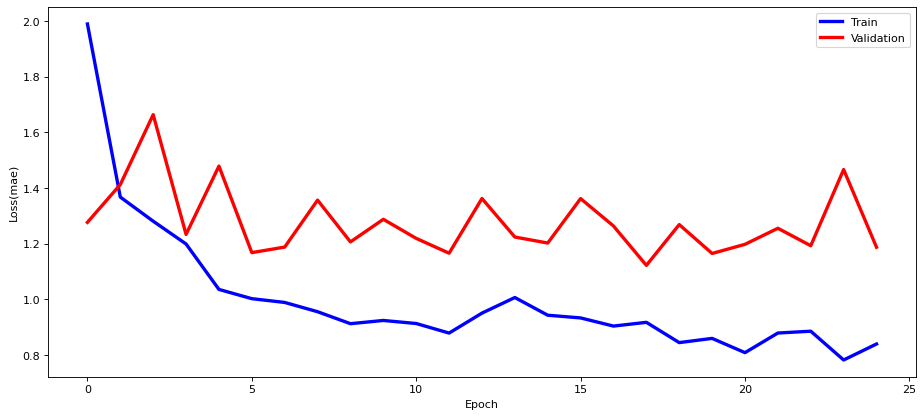

In [29]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r11['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r11['val_loss'], 'r', label = 'Validation', linewidth = 3)
ax.set_title('', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

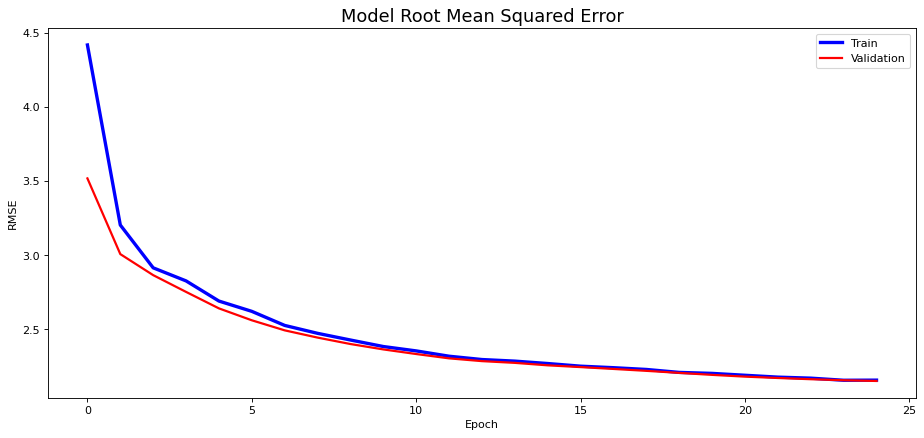

In [30]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r11['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r11['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Mean Squared Error', fontsize = 16)
ax.set_ylabel("RMSE")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

6/6 [==============================] - 0s 2ms/step


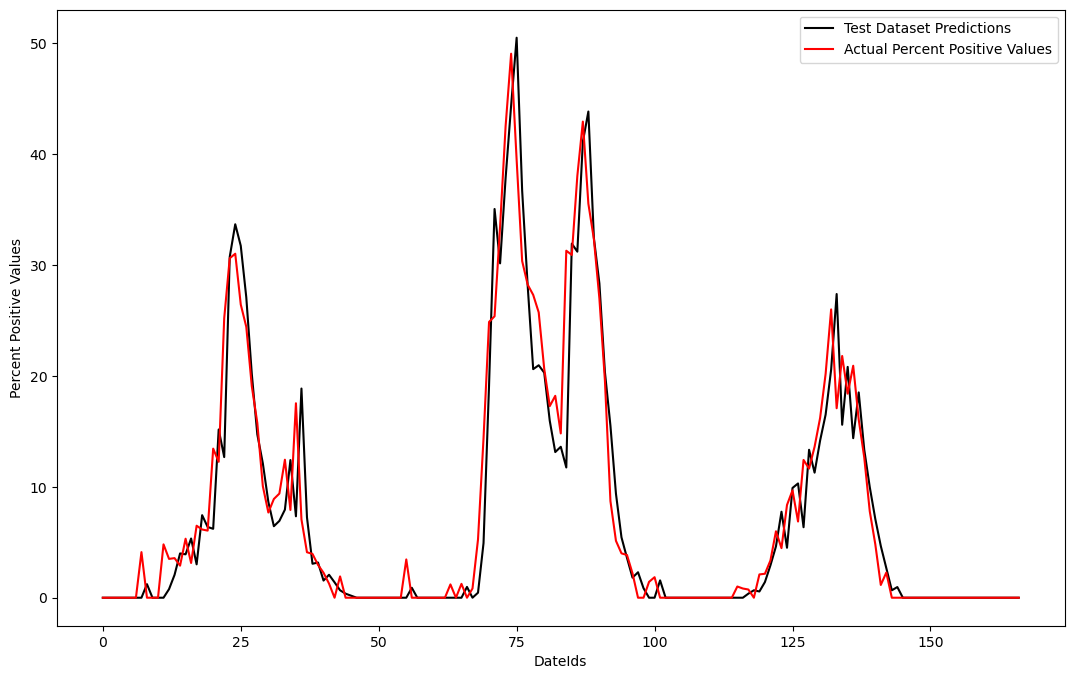

In [31]:
test_pred_r11 = optimum_model.predict(X_test_r11).flatten()
test_results_r11 = pd.DataFrame(data={'Test Predictions': test_pred_r11, 'Actual Percent Positive Values':y_test_r11.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r11['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r11['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [32]:
error_r11= mean_squared_error(y_test_r11, test_pred_r11)
print("RootMeanSquaredError: ", np.sqrt(error_r11))

mae_r11 = mean_absolute_error(y_test_r11, test_pred_r11)
print("Mean Absolute Error: ", mae_r11)


RootMeanSquaredError:  3.60056988699365
Mean Absolute Error:  1.9990100593945224


# SARIMA Model


<Figure size 1000x1400 with 0 Axes>

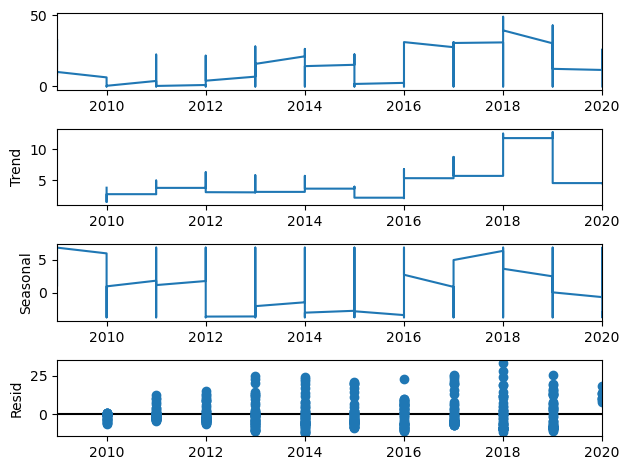

<Figure size 1000x1400 with 0 Axes>

In [33]:
seasonal_decompose(df_r11, model='=addittive', period = 60).plot();
plt.figure(figsize = (10,14))

In [34]:
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')


In [35]:
adf_test(df_r11['InfA_PP'])

1. ADF :  -5.799511050546874
2. P-Value :  4.6665331384627164e-07
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression: 560
5. Critical Values :
	 1% :  -3.442081300525009
	 5% :  -2.8667149792729596
	 10% :  -2.569526100127551
The series is stationary


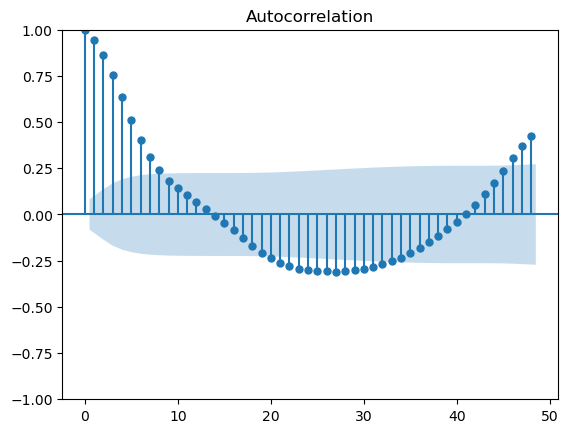

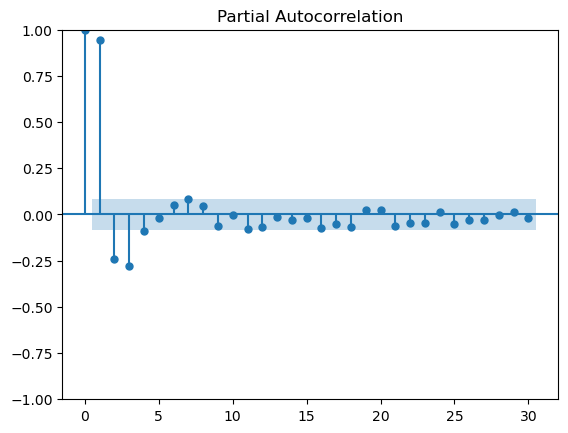

In [36]:
plot_acf(df_r11['InfA_PP'], lags=48);
plot_pacf(df_r11['InfA_PP'], lags=30);

In [37]:
from tqdm import tqdm_notebook

def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [38]:
from itertools import product
p = q = P = Q = range(0, 2, 1)
d = 0
D = 0
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

16


In [39]:
import warnings
  

warnings.filterwarnings('ignore')

In [40]:
result_df_r11 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r11['InfA_PP'])
result_df_r11


  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(1, 1, 1, 1)",2801.007536
1,"(1, 1, 0, 1)",2801.397951
2,"(1, 1, 0, 0)",2801.447019
3,"(1, 1, 1, 0)",2801.745897
4,"(1, 0, 1, 1)",2813.028188
5,"(1, 0, 0, 1)",2815.316579
6,"(1, 0, 0, 0)",2815.516557
7,"(1, 0, 1, 0)",2815.874757
8,"(0, 1, 1, 1)",3279.386781
9,"(0, 1, 1, 0)",3299.784251


In [41]:
best_model_r11 = SARIMAX(df_r11['InfA_PP'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 4)).fit(dis=-1)
print(best_model_r11.summary())


                                     SARIMAX Results                                     
Dep. Variable:                           InfA_PP   No. Observations:                  572
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 4)   Log Likelihood               -1395.504
Date:                           Fri, 03 Feb 2023   AIC                           2801.008
Time:                                   01:13:30   BIC                           2822.753
Sample:                                        0   HQIC                          2809.491
                                           - 572                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9501      0.009    109.695      0.000       0.933       0.967
ma.L1          0.1340      0.028      4.811

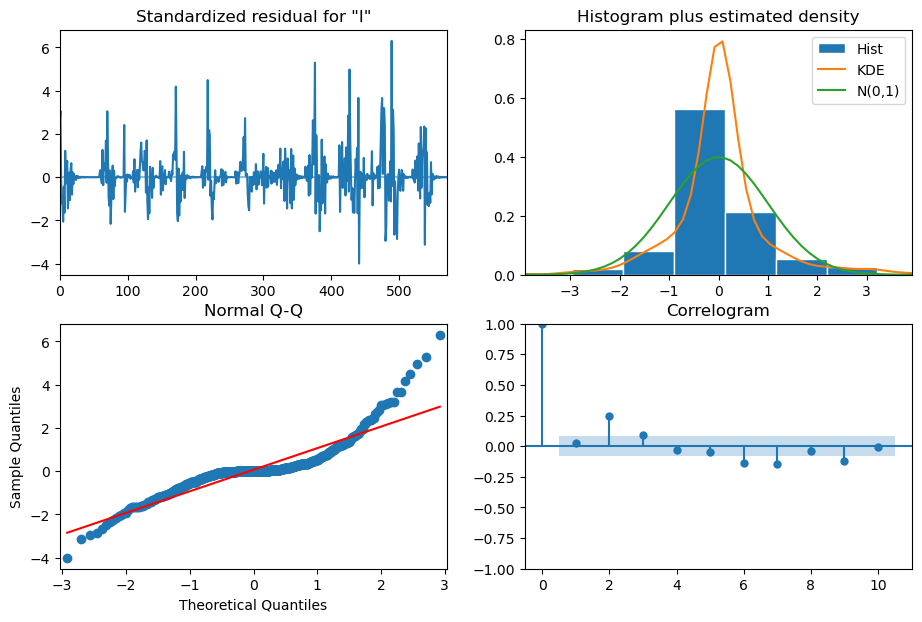

In [42]:
best_model_r11.plot_diagnostics(figsize=(11,7));

In [43]:
pred_r11 = best_model_r11.predict()

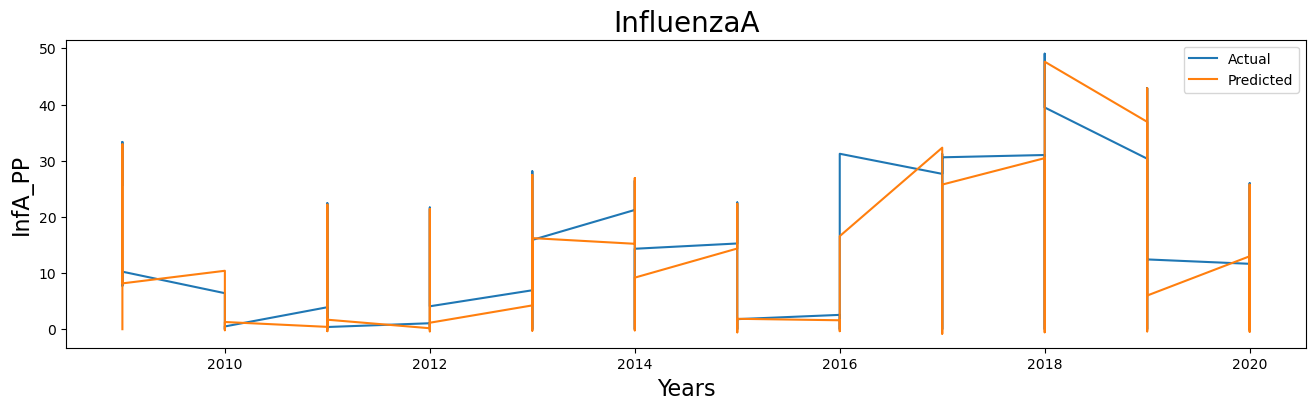

In [44]:
plt.figure(figsize=(16,4))
plt.plot(df_r11['InfA_PP'], label="Actual")
plt.plot(pred_r11, label="Predicted")
plt.title('InfluenzaA', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('InfA_PP', fontsize=16)
plt.legend()

In [45]:
error_r1= mean_squared_error(df_r11['InfA_PP'], pred_r11)
print("RootMeanSquaredError: ", np.sqrt(error_r1))

mae_r1 = mean_absolute_error(df_r11['InfA_PP'], pred_r11)
print("Mean Absolute Error: ", mae_r1)


RootMeanSquaredError:  2.9565181708673895
Mean Absolute Error:  1.5874497653536588


## **RSV**

In [46]:
df_reg1_rv2 = df_reg1.loc[df_reg1['respiratory_virus'] == 'RSV']
df_reg1_rv2

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
2,2009-2010,10-10-2009,Central,RSV,0,329,0.0
9,2009-2010,17-10-2009,Central,RSV,0,380,0.0
15,2009-2010,24-10-2009,Central,RSV,0,278,0.0
21,2009-2010,31-10-2009,Central,RSV,2,201,1.0
27,2009-2010,07-11-2009,Central,RSV,0,176,0.0
...,...,...,...,...,...,...,...
3613,2019-2020,29-08-2020,Central,RSV,0,38,0.0
3619,2019-2020,05-09-2020,Central,RSV,0,34,0.0
3625,2019-2020,12-09-2020,Central,RSV,0,31,0.0
3631,2019-2020,19-09-2020,Central,RSV,0,28,0.0


In [47]:
df_r12 = df_reg1_rv2[['weekending', 'percent_positive']]
df_r12['RSV_PP'] = df_r12['percent_positive']
df_r12 = df_r12.drop(['percent_positive'], axis = 1)
df_r12['Year'] = pd.DatetimeIndex(df_r12['weekending']).year
df_r12.head()

,weekending,RSV_PP,Year
2,10-10-2009,0.0,2009
9,17-10-2009,0.0,2009
15,24-10-2009,0.0,2009
21,31-10-2009,1.0,2009
27,07-11-2009,0.0,2009


In [48]:
df_r12['RSV_PP'].describe()

count    572.000000
mean       8.133899
std       11.062834
min        0.000000
25%        0.000000
50%        2.600000
75%       12.932500
max       54.330000
Name: RSV_PP, dtype: float64

In [49]:
df_r12.set_index('Year', drop = True, inplace = True)
df_r12

,weekending,RSV_PP
Year,,
2009,10-10-2009,0.0
2009,17-10-2009,0.0
2009,24-10-2009,0.0
2009,31-10-2009,1.0
2009,07-11-2009,0.0
...,...,...
2020,29-08-2020,0.0
2020,05-09-2020,0.0
2020,12-09-2020,0.0


In [50]:
df_r12 = df_r12.drop(['weekending'], axis = 1)

In [51]:
window_size = 5
X_r12, y_r12 = df_to_X_y(df_r12, window_size)
X_r12.shape, y_r12.shape

((567, 5, 1, 1), (567, 1))

In [52]:
X_train_r12, y_train_r12 = X_r12[:250], y_r12[:250]
X_val_r12, y_val_r12 = X_r12[250:400], y_r12[250:400]
X_test_r12, y_test_r12 = X_r12[400:], y_r12[400:]

X_train_r12.shape, y_train_r12.shape, X_test_r12.shape, y_test_r12.shape, X_val_r12.shape, y_val_r12.shape

((250, 5, 1, 1), (250, 1), (167, 5, 1, 1), (167, 1), (150, 5, 1, 1), (150, 1))

In [53]:
# Tunner search
tuner.search(X_train_r12, y_train_r12, epochs = 10, validation_data = (X_val_r12, y_val_r12))

INFO:tensorflow:Oracle triggered exit


In [54]:
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r12 = optimum_model.fit(X_train_r12, y_train_r12, epochs = nb_epochs,validation_data = (X_val_r12, y_val_r12)).history


Epoch 1/25
8/8 [==============================] - 1s 22ms/step - loss: 5.4121 - root_mean_squared_error: 10.8199 - val_loss: 2.1720 - val_root_mean_squared_error: 8.0904
Epoch 2/25
8/8 [==============================] - 0s 8ms/step - loss: 2.8484 - root_mean_squared_error: 6.9523 - val_loss: 1.7008 - val_root_mean_squared_error: 6.2006
Epoch 3/25
8/8 [==============================] - 0s 7ms/step - loss: 2.5072 - root_mean_squared_error: 5.7451 - val_loss: 1.9786 - val_root_mean_squared_error: 5.4042
Epoch 4/25
8/8 [==============================] - 0s 7ms/step - loss: 2.4843 - root_mean_squared_error: 5.1799 - val_loss: 1.8117 - val_root_mean_squared_error: 4.9801
Epoch 5/25
8/8 [==============================] - 0s 8ms/step - loss: 2.3658 - root_mean_squared_error: 4.8266 - val_loss: 1.7384 - val_root_mean_squared_error: 4.6876
Epoch 6/25
8/8 [==============================] - 0s 8ms/step - loss: 2.3111 - root_mean_squared_error: 4.5697 - val_loss: 1.7857 - val_root_mean_squared_erro

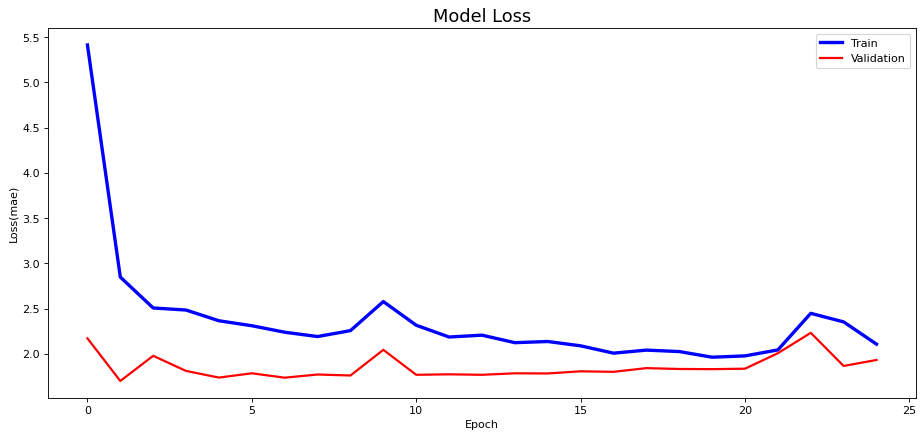

In [55]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r12['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r12['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

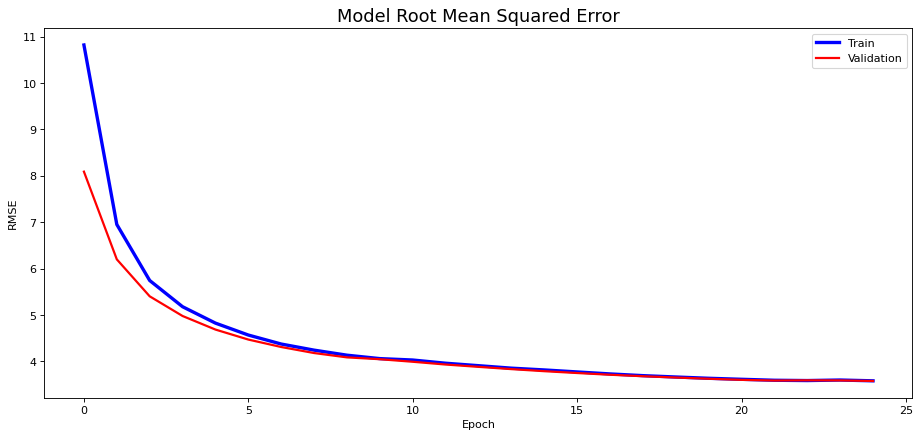

In [56]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r12['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r12['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Mean Squared Error', fontsize = 16)
ax.set_ylabel("RMSE")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

6/6 [==============================] - 0s 2ms/step


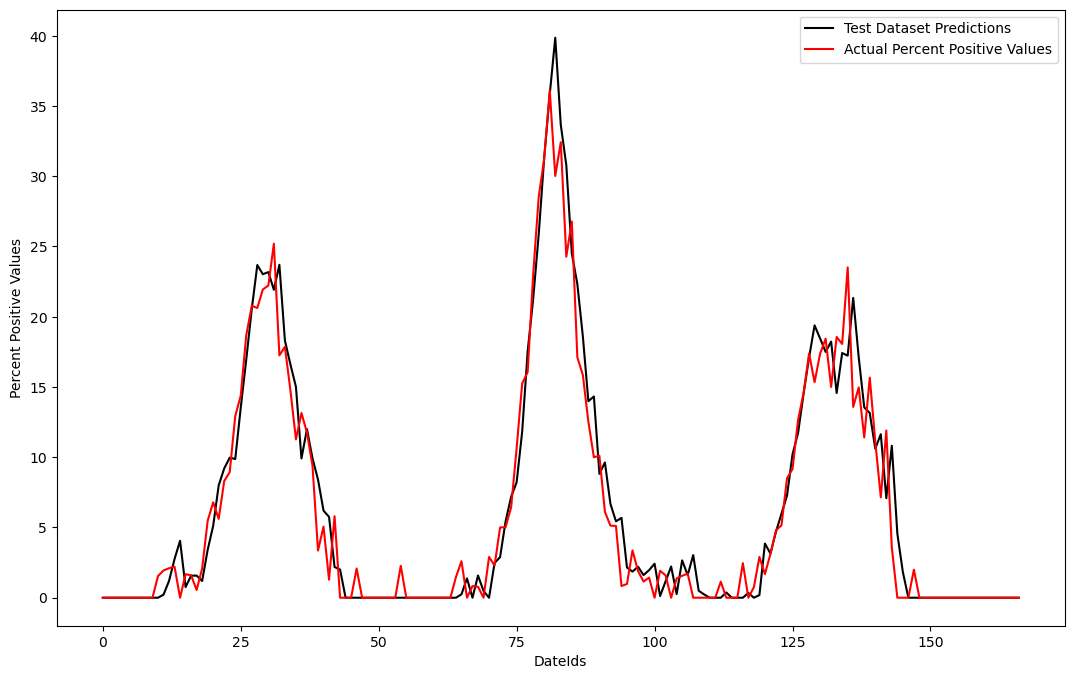

In [57]:
test_pred_r12 = optimum_model.predict(X_test_r12).flatten()
test_results_r12 = pd.DataFrame(data={'Test Predictions': test_pred_r12, 'Actual Percent Positive Values':y_test_r12.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r12['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r12['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [58]:
error_r12= mean_squared_error(y_test_r12, test_pred_r12)
print("RootMeanSquaredError: ", np.sqrt(error_r12))

mae_r12 = mean_absolute_error(y_test_r12, test_pred_r12)
print("Mean Absolute Error: ", mae_r12)


RootMeanSquaredError:  2.262926181842811
Mean Absolute Error:  1.3989069214802303


### SARIMA Model

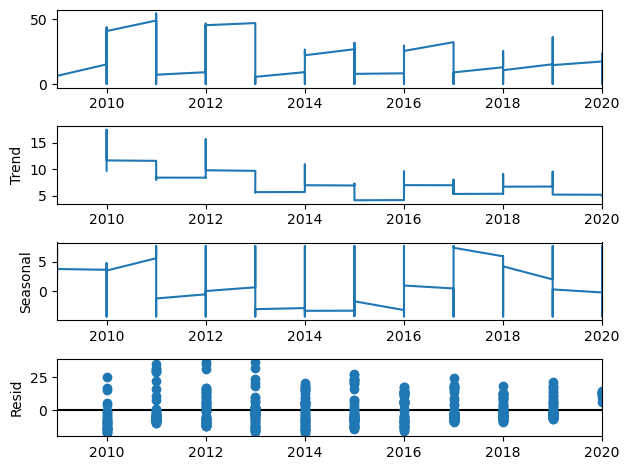

In [59]:
seasonal_decompose(df_r12, model='additive', period=60).plot();

In [60]:
adf_test(df_r12['RSV_PP'])

1. ADF :  -7.78044003848632
2. P-Value :  8.445526228131795e-12
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression: 567
5. Critical Values :
	 1% :  -3.441935806025943
	 5% :  -2.8666509204896093
	 10% :  -2.5694919649816947
The series is stationary


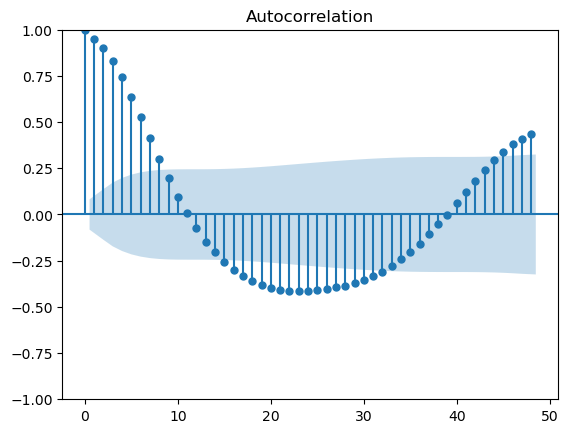

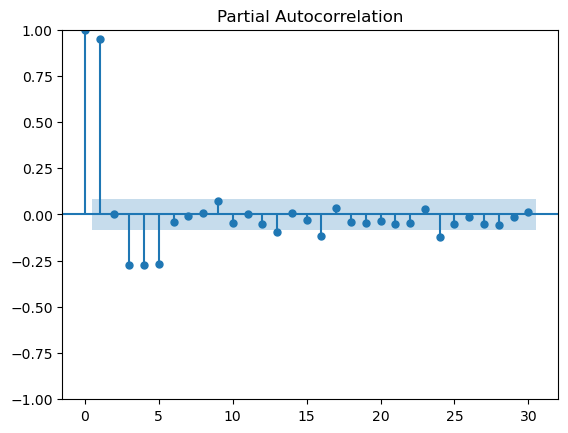

In [61]:
plot_acf(df_r12['RSV_PP'], lags=48);
plot_pacf(df_r12['RSV_PP'], lags=30);

In [62]:
result_df_r12 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r12['RSV_PP'])
result_df_r12

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(1, 0, 1, 1)",3005.462021
1,"(1, 1, 1, 1)",3005.923708
2,"(1, 0, 0, 1)",3007.700656
3,"(1, 1, 0, 1)",3007.719923
4,"(1, 0, 1, 0)",3014.366805
5,"(1, 1, 1, 0)",3015.245526
6,"(1, 0, 0, 0)",3038.677243
7,"(1, 1, 0, 0)",3040.633183
8,"(0, 1, 1, 1)",3428.628401
9,"(0, 1, 1, 0)",3501.504100


In [63]:
best_model_r12 = SARIMAX(df_r12['RSV_PP'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 4)).fit(dis=-1)
print(best_model_r12.summary())

                                      SARIMAX Results                                      
Dep. Variable:                              RSV_PP   No. Observations:                  572
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 4)   Log Likelihood               -1498.731
Date:                             Fri, 03 Feb 2023   AIC                           3005.462
Time:                                     01:14:26   BIC                           3022.859
Sample:                                          0   HQIC                          3012.249
                                             - 572                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9579      0.007    129.010      0.000       0.943       0.972
ar.S.L4       -0.3462      

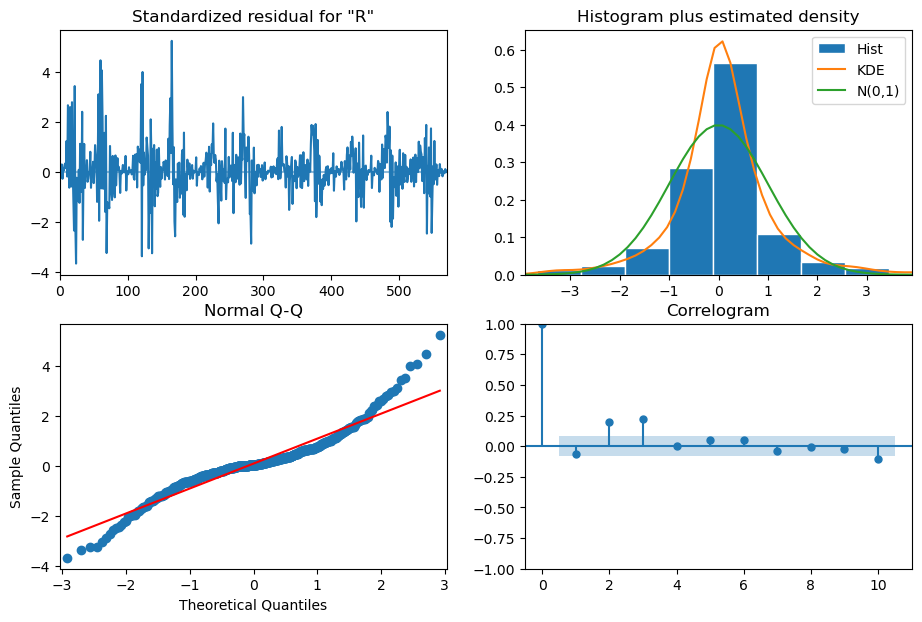

In [64]:
best_model_r12.plot_diagnostics(figsize=(11,7));

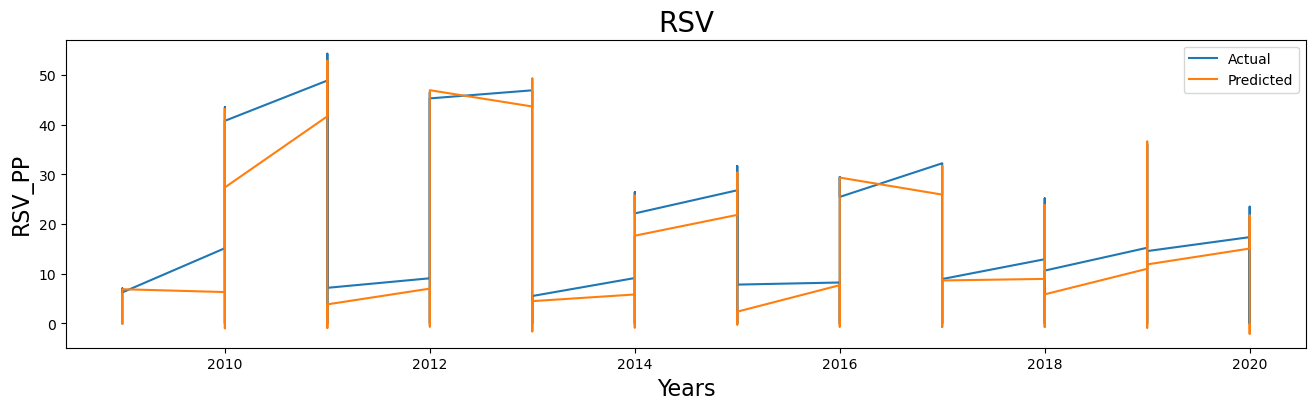

In [65]:
pred_r12 = best_model_r12.predict()
plt.figure(figsize=(16,4))
plt.plot(df_r12['RSV_PP'], label="Actual")
plt.plot(pred_r12, label="Predicted")
plt.title('RSV', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('RSV_PP', fontsize=16)
plt.legend()

In [66]:
error_r2= mean_squared_error(df_r12['RSV_PP'], pred_r12)
print("RootMeanSquaredError: ", np.sqrt(error_r2))

mae_r2 = mean_absolute_error(df_r12['RSV_PP'], pred_r12)
print("Mean Absolute Error: ", mae_r2)


RootMeanSquaredError:  3.315347205158631
Mean Absolute Error:  2.1658239348053514


## **Adenovirus**

In [67]:
df_reg1_rv3 = df_reg1.loc[df_reg1['respiratory_virus'] == 'Adenovirus']
df_reg1_rv3

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
7311,2013-2014,05-10-2013,Central,Adenovirus,0,73,0.00
7315,2013-2014,12-10-2013,Central,Adenovirus,0,88,0.00
7319,2013-2014,19-10-2013,Central,Adenovirus,0,101,0.00
7323,2013-2014,26-10-2013,Central,Adenovirus,1,67,1.49
7327,2013-2014,02-11-2013,Central,Adenovirus,1,72,1.39
...,...,...,...,...,...,...,...
9601,2019-2020,29-08-2020,Central,Adenovirus,1,38,2.63
9607,2019-2020,05-09-2020,Central,Adenovirus,0,34,0.00
9613,2019-2020,12-09-2020,Central,Adenovirus,0,31,0.00
9619,2019-2020,19-09-2020,Central,Adenovirus,0,28,0.00


In [68]:
df_r13 = df_reg1_rv3[['weekending', 'percent_positive']]
df_r13['Adeno_PP'] = df_r13['percent_positive']
df_r13 = df_r13.drop(['percent_positive'], axis = 1)
df_r13['Year'] = pd.DatetimeIndex(df_r13['weekending']).year
df_r13.head()

,weekending,Adeno_PP,Year
7311,05-10-2013,0.00,2013
7315,12-10-2013,0.00,2013
7319,19-10-2013,0.00,2013
7323,26-10-2013,1.49,2013
7327,02-11-2013,1.39,2013


In [69]:
df_r13['Adeno_PP'].describe()

count    365.000000
mean       3.853753
std        2.994781
min        0.000000
25%        2.040000
50%        3.360000
75%        5.340000
max       22.220000
Name: Adeno_PP, dtype: float64

In [70]:
df_r13.set_index('Year', drop = True, inplace = True)
df_r13 = df_r13.drop(['weekending'], axis = 1)
df_r13.head()

,Adeno_PP
Year,
2013,0.00
2013,0.00
2013,0.00
2013,1.49
2013,1.39


In [71]:
window_size = 5
X_r13, y_r13 = df_to_X_y(df_r13, window_size)
X_r13.shape, y_r13.shape

((360, 5, 1, 1), (360, 1))

In [72]:
X_train_r13, y_train_r13 = X_r13[:150], y_r13[:150]
X_val_r13, y_val_r13 = X_r13[150:250], y_r13[150:250]
X_test_r13, y_test_r13 = X_r13[250:], y_r13[250:]

X_train_r13.shape, y_train_r13.shape, X_test_r13.shape, y_test_r13.shape,  X_val_r13.shape, y_val_r13.shape

((150, 5, 1, 1), (150, 1), (110, 5, 1, 1), (110, 1), (100, 5, 1, 1), (100, 1))

In [73]:
# Tunner search
tuner.search(X_train_r13, y_train_r13, epochs = 10, validation_data = (X_val_r13, y_val_r13))

INFO:tensorflow:Oracle triggered exit


In [74]:
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r13 = optimum_model.fit(X_train_r13, y_train_r13, epochs = nb_epochs, validation_data = (X_val_r13, y_val_r13)).history


Epoch 1/25
5/5 [==============================] - 1s 52ms/step - loss: 1.8069 - root_mean_squared_error: 2.8216 - val_loss: 3.2209 - val_root_mean_squared_error: 3.1202
Epoch 2/25
5/5 [==============================] - 0s 15ms/step - loss: 1.4574 - root_mean_squared_error: 3.0509 - val_loss: 2.6485 - val_root_mean_squared_error: 3.0339
Epoch 3/25
5/5 [==============================] - 0s 16ms/step - loss: 1.2623 - root_mean_squared_error: 2.9208 - val_loss: 2.7634 - val_root_mean_squared_error: 2.9644
Epoch 4/25
5/5 [==============================] - 0s 16ms/step - loss: 1.3274 - root_mean_squared_error: 2.9089 - val_loss: 2.5700 - val_root_mean_squared_error: 2.9182
Epoch 5/25
5/5 [==============================] - 0s 18ms/step - loss: 1.2550 - root_mean_squared_error: 2.8649 - val_loss: 2.7496 - val_root_mean_squared_error: 2.8817
Epoch 6/25
5/5 [==============================] - 0s 17ms/step - loss: 1.2427 - root_mean_squared_error: 2.8463 - val_loss: 2.6133 - val_root_mean_squared_

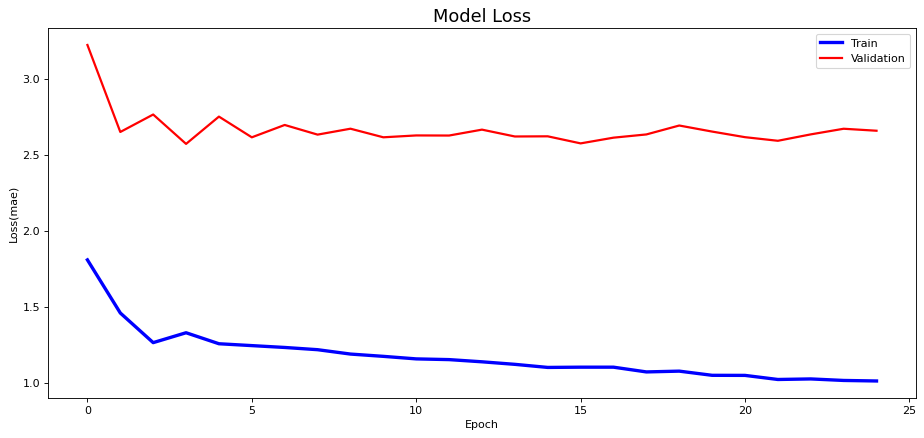

In [75]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r13['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r13['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

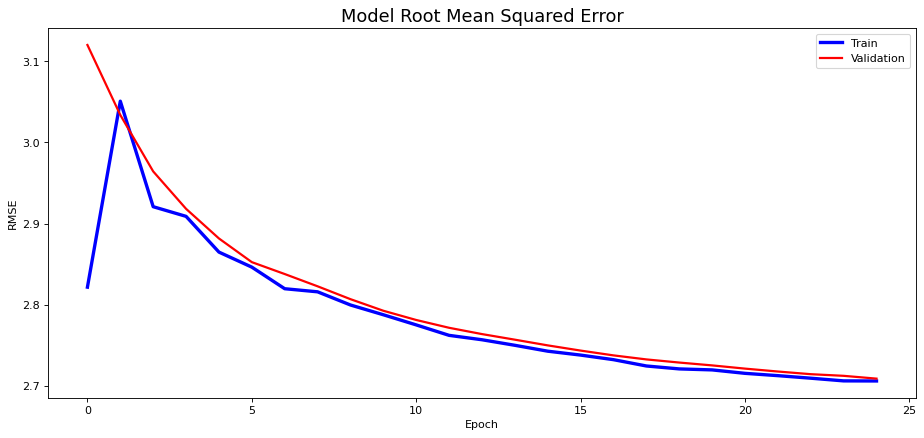

In [76]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r13['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r13['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Mean Squared Error', fontsize = 16)
ax.set_ylabel("RMSE")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

4/4 [==============================] - 0s 3ms/step


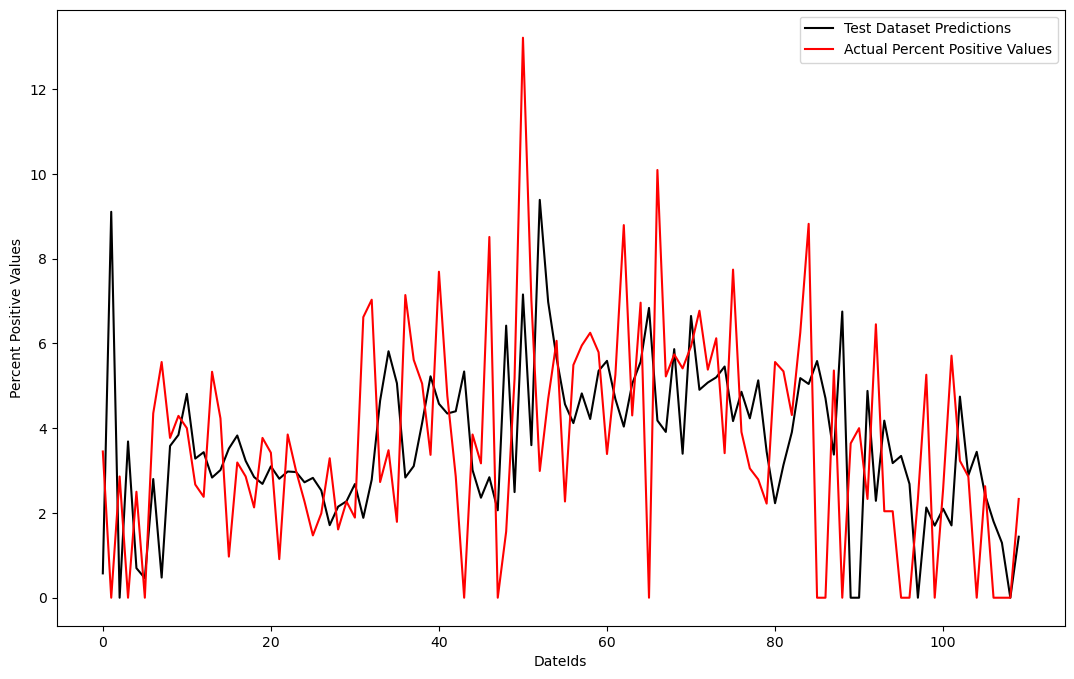

In [77]:
test_pred_r13 = optimum_model.predict(X_test_r13).flatten()
test_results_r13 = pd.DataFrame(data={'Test Predictions': test_pred_r13, 'Actual Percent Positive Values':y_test_r13.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r13['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r13['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [78]:
error_r13= mean_squared_error(y_test_r13, test_pred_r13)
print("RootMeanSquaredError: ", np.sqrt(error_r13))

mae_r13 = mean_absolute_error(y_test_r13, test_pred_r13)
print("Mean Absolute Error: ", mae_r13)


RootMeanSquaredError:  2.851603034024463
Mean Absolute Error:  2.2043370131362567


### SARIMA Model

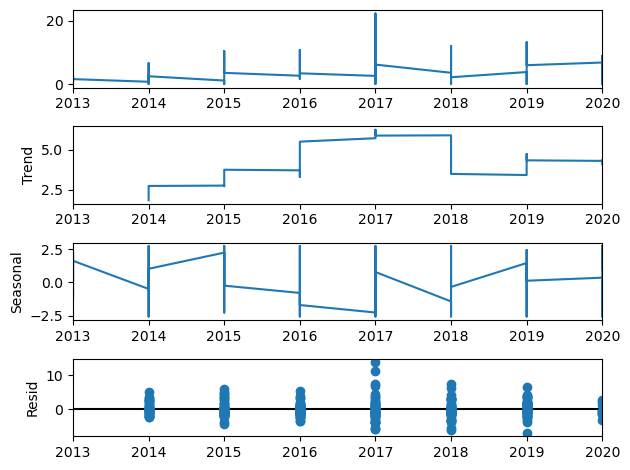

In [79]:
seasonal_decompose(df_r13, model='additive', period=60).plot();

In [80]:
adf_test(df_r13['Adeno_PP'])

1. ADF :  -5.0004467015810805
2. P-Value :  2.2148021759678957e-05
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 361
5. Critical Values :
	 1% :  -3.4485948978753314
	 5% :  -2.86957971128312
	 10% :  -2.571053050314224
The series is stationary


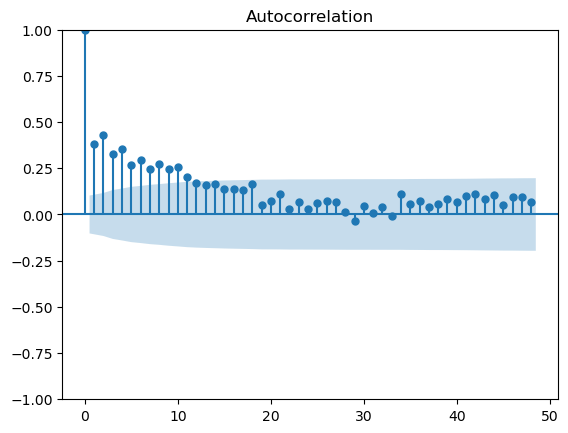

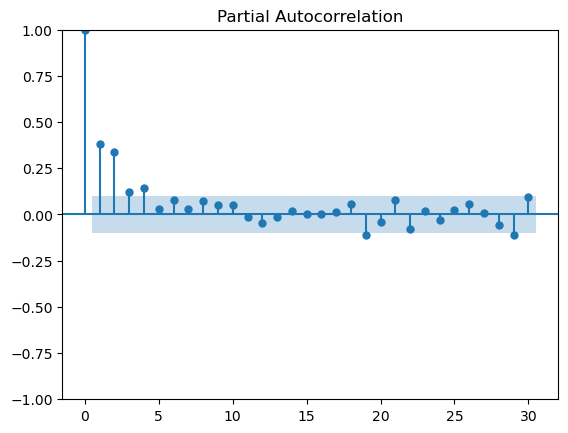

In [81]:
plot_acf(df_r13['Adeno_PP'], lags=48);
plot_pacf(df_r13['Adeno_PP'], lags=30);

In [82]:
result_df_r13 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r13['Adeno_PP'])
result_df_r13

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(1, 1, 0, 0)",1733.166193
1,"(1, 1, 1, 0)",1734.628952
2,"(1, 1, 0, 1)",1734.657182
3,"(1, 1, 1, 1)",1736.192528
4,"(1, 0, 1, 1)",1783.413485
5,"(0, 1, 1, 1)",1792.438843
6,"(0, 0, 1, 1)",1805.869434
7,"(1, 0, 1, 0)",1855.115388
8,"(1, 0, 0, 1)",1862.654421
9,"(0, 1, 1, 0)",1869.602365


In [83]:
best_model_r13 = SARIMAX(df_r13['Adeno_PP'], order=(1, 0, 1), seasonal_order=(0, 0, 0, 4)).fit(dis=-1)
print(best_model_r13.summary())

                               SARIMAX Results                                
Dep. Variable:               Adeno_PP   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -863.583
Date:                Fri, 03 Feb 2023   AIC                           1733.166
Time:                        01:16:30   BIC                           1744.866
Sample:                             0   HQIC                          1737.816
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9894      0.007    146.288      0.000       0.976       1.003
ma.L1         -0.7796      0.026    -30.076      0.000      -0.830      -0.729
sigma2         6.6129      0.285     23.219      0.0

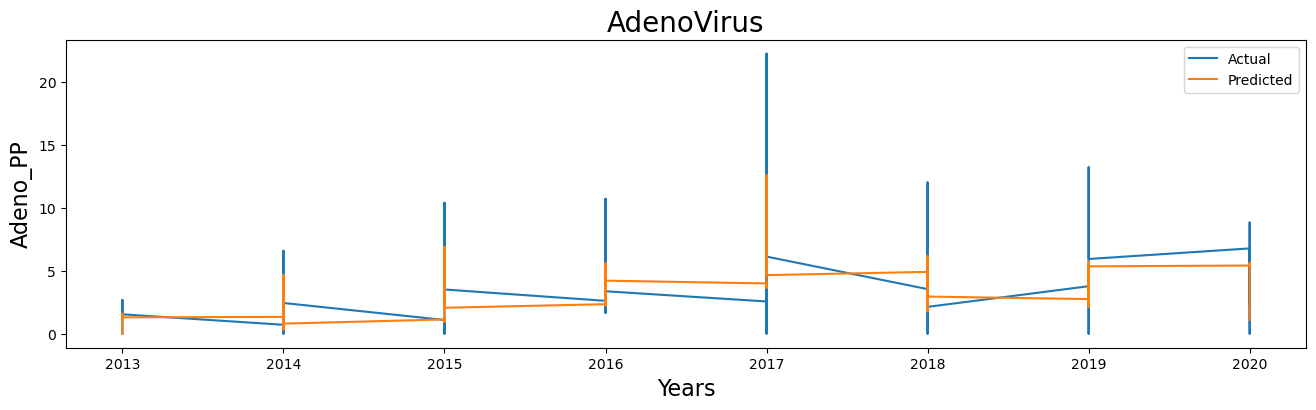

In [84]:
pred_r13 = best_model_r13.predict()
plt.figure(figsize=(16,4))
plt.plot(df_r13['Adeno_PP'], label="Actual")
plt.plot(pred_r13, label="Predicted")
plt.title('AdenoVirus', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Adeno_PP', fontsize=16)
plt.legend()

In [85]:
error_r3= mean_squared_error(df_r13['Adeno_PP'], pred_r13)
print("RootMeanSquaredError: ", np.sqrt(error_r3))

mae_r3 = mean_absolute_error(df_r13['Adeno_PP'], pred_r13)
print("Mean Absolute Error: ", mae_r3)

RootMeanSquaredError:  2.571740742885153
Mean Absolute Error:  1.8069542848277282


## **HMPV**

In [86]:
df_reg1_rv4 = df_reg1.loc[df_reg1['respiratory_virus'] == 'HMPV']
df_reg1_rv4

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
9631,2013-2014,05-10-2013,Central,HMPV,1,73,1.37
9635,2013-2014,12-10-2013,Central,HMPV,1,88,1.14
9639,2013-2014,19-10-2013,Central,HMPV,0,90,0.00
9643,2013-2014,26-10-2013,Central,HMPV,0,56,0.00
9647,2013-2014,02-11-2013,Central,HMPV,0,57,0.00
...,...,...,...,...,...,...,...
11914,2019-2020,29-08-2020,Central,HMPV,0,38,0.00
11920,2019-2020,05-09-2020,Central,HMPV,0,34,0.00
11926,2019-2020,12-09-2020,Central,HMPV,0,31,0.00
11932,2019-2020,19-09-2020,Central,HMPV,0,28,0.00


In [87]:
df_r14 = df_reg1_rv4[['weekending', 'percent_positive']]
df_r14['HMPV_PP'] = df_r14['percent_positive']
df_r14 = df_r14.drop(['percent_positive'], axis = 1)
df_r14['Year'] = pd.DatetimeIndex(df_r14['weekending']).year
df_r14.head()

,weekending,HMPV_PP,Year
9631,05-10-2013,1.37,2013
9635,12-10-2013,1.14,2013
9639,19-10-2013,0.00,2013
9643,26-10-2013,0.00,2013
9647,02-11-2013,0.00,2013


In [88]:
df_r14['HMPV_PP'].describe()

count    365.000000
mean       3.100274
std        4.169301
min        0.000000
25%        0.000000
50%        1.350000
75%        4.550000
max       19.350000
Name: HMPV_PP, dtype: float64

In [89]:
df_r14.set_index('Year', drop = True, inplace = True)
df_r14 = df_r14.drop(['weekending'], axis = 1)
df_r14.head()

,HMPV_PP
Year,
2013,1.37
2013,1.14
2013,0.00
2013,0.00
2013,0.00


In [90]:
window_size = 5
X_r14, y_r14 = df_to_X_y(df_r14, window_size)
X_r14.shape, y_r14.shape

((360, 5, 1, 1), (360, 1))

In [91]:
X_train_r14, y_train_r14 = X_r14[:135], y_r14[:135]
X_val_r14, y_val_r14 = X_r14[135:250], y_r14[135:250]
X_test_r14, y_test_r14 = X_r14[250:], y_r14[250:]

X_train_r14.shape, y_train_r14.shape, X_test_r14.shape, y_test_r14.shape, X_val_r14.shape, y_val_r14.shape

((135, 5, 1, 1), (135, 1), (110, 5, 1, 1), (110, 1), (115, 5, 1, 1), (115, 1))

In [92]:
# Tunner search
tuner.search(X_train_r14, y_train_r14, epochs = 10, validation_data = (X_val_r14, y_val_r14))

INFO:tensorflow:Oracle triggered exit


In [93]:
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r14 = optimum_model.fit(X_train_r14, y_train_r14, epochs = nb_epochs, validation_data = (X_val_r14, y_val_r14) ).history


Epoch 1/25
5/5 [==============================] - 1s 72ms/step - loss: 2.1867 - root_mean_squared_error: 4.0525 - val_loss: 2.0584 - val_root_mean_squared_error: 3.3121
Epoch 2/25
5/5 [==============================] - 0s 20ms/step - loss: 1.7041 - root_mean_squared_error: 3.1652 - val_loss: 1.7827 - val_root_mean_squared_error: 3.0008
Epoch 3/25
5/5 [==============================] - 0s 15ms/step - loss: 1.6443 - root_mean_squared_error: 2.9694 - val_loss: 1.8187 - val_root_mean_squared_error: 2.9050
Epoch 4/25
5/5 [==============================] - 0s 16ms/step - loss: 1.4918 - root_mean_squared_error: 2.8688 - val_loss: 1.6995 - val_root_mean_squared_error: 2.8163
Epoch 5/25
5/5 [==============================] - 0s 17ms/step - loss: 1.5671 - root_mean_squared_error: 2.7837 - val_loss: 1.7183 - val_root_mean_squared_error: 2.7522
Epoch 6/25
5/5 [==============================] - 0s 14ms/step - loss: 1.4612 - root_mean_squared_error: 2.7251 - val_loss: 1.6836 - val_root_mean_squared_

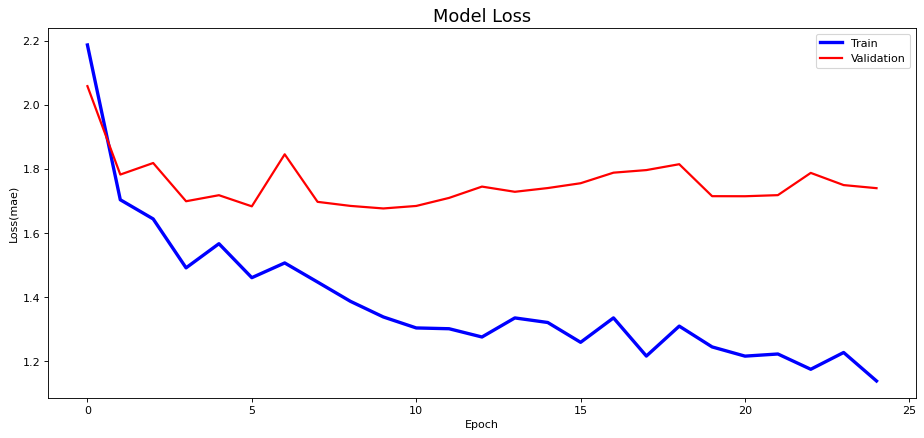

In [94]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r14['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r14['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

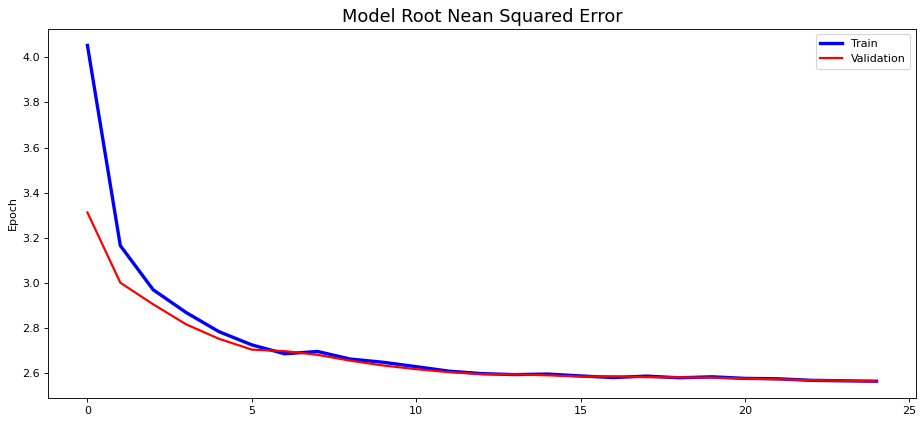

In [95]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r14['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r14['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Nean Squared Error', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_ylabel("Epoch")
ax.legend(loc='upper right')
plt.show()

4/4 [==============================] - 0s 5ms/step


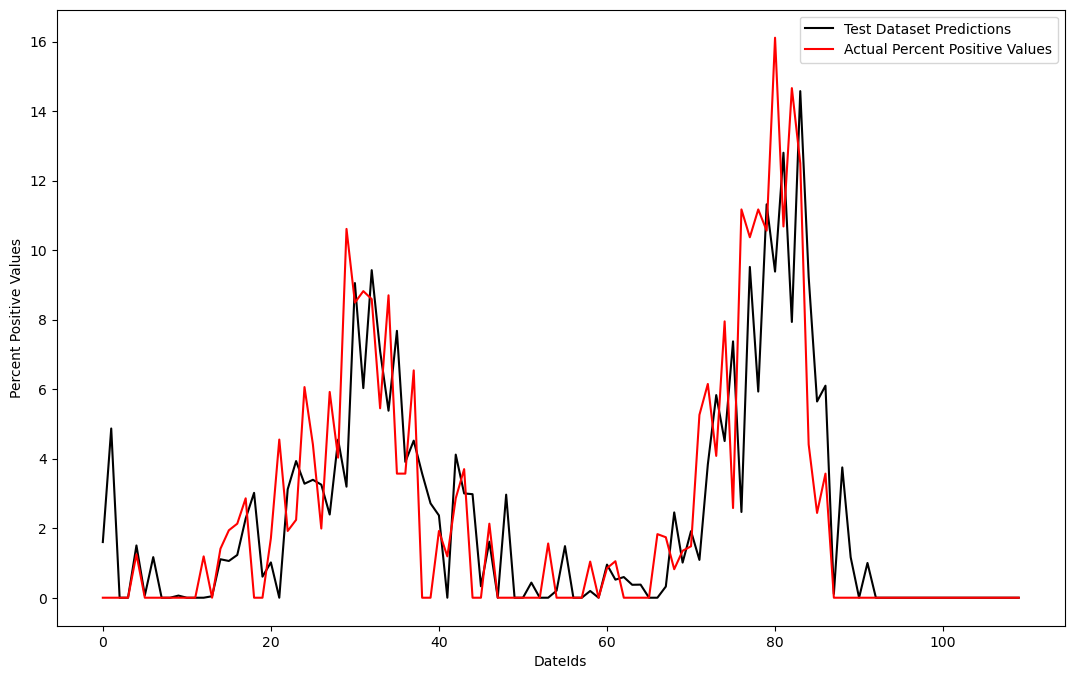

In [96]:
test_pred_r14 = optimum_model.predict(X_test_r14).flatten()
test_results_r14 = pd.DataFrame(data={'Test Predictions': test_pred_r14, 'Actual Percent Positive Values':y_test_r14.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r14['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r14['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [97]:
error_r14= mean_squared_error(y_test_r14, test_pred_r14)
print("RootMeanSquaredError: ", np.sqrt(error_r14))

mae_r14 = mean_absolute_error(y_test_r14, test_pred_r14)
print("Mean Absolute Error: ", mae_r14)


RootMeanSquaredError:  2.26695015365458
Mean Absolute Error:  1.3719029472659936


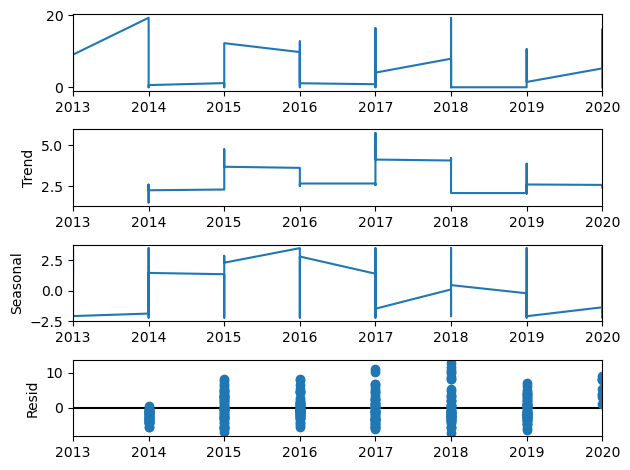

In [98]:
seasonal_decompose(df_r14, model='additive', period=60).plot();

In [99]:
adf_test(df_r14['HMPV_PP'])

1. ADF :  -5.344957233463132
2. P-Value :  4.415863734274856e-06
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression: 357
5. Critical Values :
	 1% :  -3.44880082033912
	 5% :  -2.869670179576637
	 10% :  -2.5711012838861036
The series is stationary


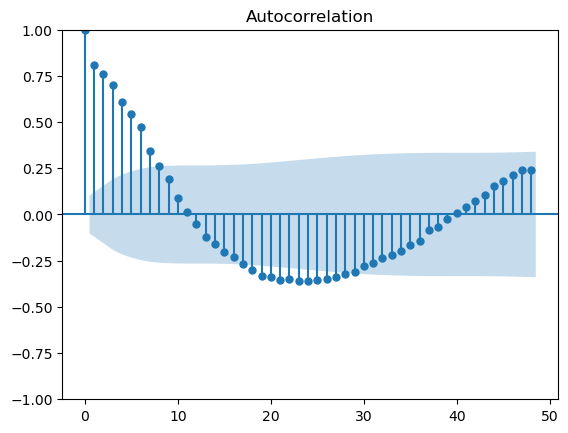

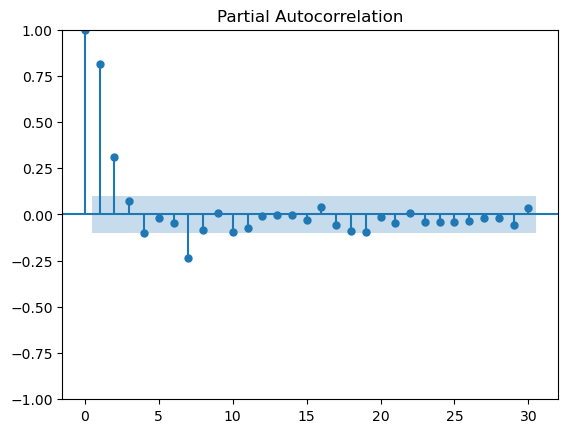

In [100]:
plot_acf(df_r14['HMPV_PP'], lags=48);
plot_pacf(df_r14['HMPV_PP'], lags=30);

In [101]:
result_df_r14 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r14['HMPV_PP'])
result_df_r14

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(1, 1, 0, 0)",1664.592374
1,"(1, 1, 0, 1)",1666.534453
2,"(1, 1, 1, 0)",1666.537356
3,"(1, 1, 1, 1)",1667.185339
4,"(1, 0, 1, 1)",1704.498447
5,"(1, 0, 0, 0)",1704.818786
6,"(1, 0, 1, 0)",1706.608120
7,"(1, 0, 0, 1)",1706.615334
8,"(0, 1, 1, 1)",1844.599020
9,"(0, 1, 1, 0)",1845.098212


In [102]:
best_model_r14 = SARIMAX(df_r14['HMPV_PP'], order=(1, 0, 1), seasonal_order=(0, 0, 0, 4)).fit(dis=-1)
print(best_model_r14.summary())

                               SARIMAX Results                                
Dep. Variable:                HMPV_PP   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -829.296
Date:                Fri, 03 Feb 2023   AIC                           1664.592
Time:                        01:17:19   BIC                           1676.292
Sample:                             0   HQIC                          1669.242
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9505      0.012     76.646      0.000       0.926       0.975
ma.L1         -0.3523      0.040     -8.702      0.000      -0.432      -0.273
sigma2         5.4831      0.246     22.249      0.0

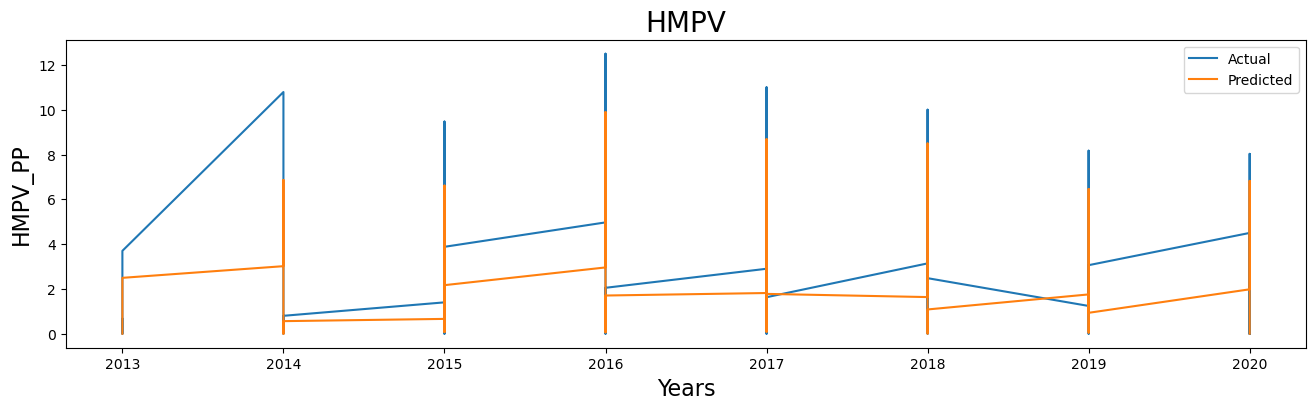

In [103]:
pred_r14 = best_model_r14.predict()
plt.figure(figsize=(16,4))
plt.plot(df_r14['HMPV_PP'], label="Actual")
plt.plot(pred_r14, label="Predicted")
plt.title('HMPV', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('HMPV_PP', fontsize=16)
plt.legend()

In [104]:
error_r4= mean_squared_error(df_r14['HMPV_PP'], pred_r14)
print("RootMeanSquaredError: ", np.sqrt(error_r4))

mae_r4 = mean_absolute_error(df_r14['HMPV_PP'], pred_r14)
print("Mean Absolute Error: ", mae_r4)

RootMeanSquaredError:  1.6125989048947877
Mean Absolute Error:  1.0992799897786036
